# Content analysis Twitter data
- 1. look for the viral tweets based on the twitter variables (likes,quotes)
- 2. outlinks, hastags and mentioned users to get an idea of how the channel is used
- 3. generate topic model and plot them per tweet over time

In [1]:
import pickle
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = open("data/election_leaning.obj","rb")
election_df = pickle.load(file)
file.close()

file = open("data/twitter_sample_w_sent.obj","rb")
twitter_df = pickle.load(file)
file.close()

In [3]:
# get sub set of 2019 
df_19 = twitter_df[twitter_df['date'].dt.year == 2019]


In [4]:
# Since for smaller parties the european election has a often higher standing than for big parties because for EU elections there is no threshold
# The content analysis will concentrate on the month before the Europan election 2019
# Therefore we first reduce the dataset to 2019 and plot and overview of the number per tweets per party

In [5]:
# make list of tuples for elections 2021 for plotting, inkl. date and defined color

# get election dates from election_df
elections = election_df["election"].unique()
election_dates = [list(election_df[election_df["election"]== i]["date"])[0] for i in elections]

election_df.head()
#election_dates = ([i for i in election_df["election"].unique()],[pd.to_datetime(i) for i in election_df["date"].unique()])
# > (elections,dates)

def add_election_color(tuple_e):
    if "Landtagswahl" in tuple_e[0] or "Abgeordnetenhauswahl" in tuple_e[0] or "Bürgerschaftswahl" in tuple_e[0]:
        return "green"
    if "Europawahl" in tuple_e[0]:
        return "blue"
    if "Bundestagswahl" in tuple_e[0]:
        return "red"
    else:
        return "darkgrey"

election_lines = [(t[0],t[1],add_election_color(t)) for t in zip(elections,election_dates)]

e_2019_lines = [i for i in election_lines if i[0][-4:] == "2019"]

e_2019_lines

[('Bürgerschaftswahl Bremen 2019', '2019-05-26T00:00:00', 'green'),
 ('Europawahl in Deutschland 2019', '2019-05-26T00:00:00', 'blue'),
 ('Landtagswahl Brandenburg 2019', '2019-09-01T00:00:00', 'green'),
 ('Landtagswahl Sachsen 2019', '2019-09-01T00:00:00', 'green'),
 ('Landtagswahl Thüringen 2019', '2019-10-27T00:00:00', 'green')]

C:\Users\Lion\AppData\Local\Temp/ipykernel_18188/2068507641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19["just_date"] = df_19["date"].dt.floor("d")
C:\Users\Lion\AppData\Local\Temp/ipykernel_18188/2068507641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19["replyCount"] = df_19["replyCount"].astype(int)
C:\Users\Lion\AppData\Local\Temp/ipykernel_18188/2068507641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

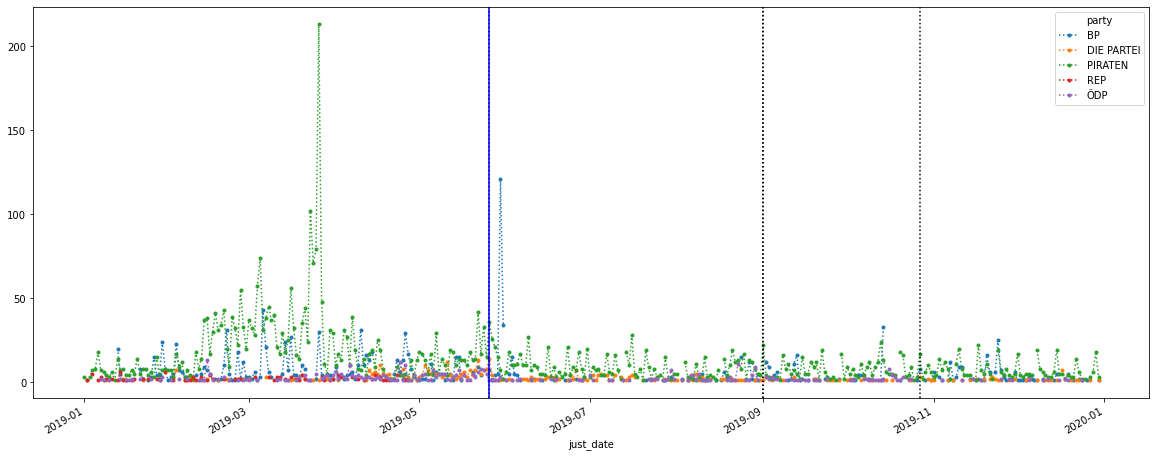

In [6]:
df_19["just_date"] = df_19["date"].dt.floor("d")
df_19["replyCount"] = df_19["replyCount"].astype(int)
df_19["retweetCount"] = df_19["retweetCount"].astype(int)
df_19["likeCount"] = df_19["likeCount"].astype(int)
df_19["quoteCount"] = df_19["quoteCount"].astype(int)

# col to int: 'replyCount','retweetCount', 'likeCount', 'quoteCount'

test = df_19.groupby(["just_date","party"]).count().unstack()

f = test["date"].plot(figsize=(20,8), marker=".", linestyle=":",)

for e in e_2019_lines:
    # federa and state elections are sometimes on the same date, for visibility federal elections get different linestyle than
    # state and eu elections
    if e[2] == "green":
        plt.axvline(x=pd.to_datetime(e[1]), color="black", linewidth=1.5, linestyle=":")
    else:
        plt.axvline(x=pd.to_datetime(e[1]), color=e[2], linewidth=1.5, linestyle="-")
    
    
plt.savefig("plots/twitter_activity_2019.png")

In [7]:
# For a proper content analysis with a topic model a good number of words is needed to get robust results
# I therefore pick the two parties for the further analysis
# That have the most activity before the election
# > Piraten and BP

Observation:
We can see that the picked parties are the ones posting by far the most, where the Pirates lead with a significant distnace before the BP.
INtersting wise the activity is only vor the BP the hhgest tight after the elections, while the most activity for the pirates can be observed around march and apirl - 2 month prior to the elction. For both parties the activity level arounf andprior to the election date is higher than for the rest of the year. That assures the assumention that the upcoming election had an influence on the activity level. SInce I want to investigate what content defined the discurse of the two parties prior to the elction The rest of the analysis will be conducted on a sub set that goes until the election only

In [8]:
df_reduced = df_19[(df_19["party"] == "BP") | (df_19["party"] == "PIRATEN")]
df_sub = df_reduced.loc[(df_reduced['date'] <= "2019-05-27")]


In [9]:
print(df_19.groupby("party").count()["clean_tweets"].to_latex())

\begin{tabular}{lr}
\toprule
{} &  clean\_tweets \\
party      &               \\
\midrule
BP         &          1389 \\
DIE PARTEI &           530 \\
PIRATEN    &          4573 \\
REP        &           136 \\
ÖDP        &           478 \\
\bottomrule
\end{tabular}



In [10]:
print(df_sub.groupby("party").count()["clean_tweets"].to_latex())

\begin{tabular}{lr}
\toprule
{} &  clean\_tweets \\
party   &               \\
\midrule
BP      &           827 \\
PIRATEN &          2925 \\
\bottomrule
\end{tabular}



In [11]:
df_19[df_19["party"]=="PIRATEN"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000,4573.000000
mean,2.334572,17.582112,57.131205,1.259130,0.261972,0.618631,0.119396
std,5.987997,35.572183,194.212223,2.302379,0.439756,0.485776,0.324290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,12.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,19.000000,44.000000,1.000000,1.000000,1.000000,0.000000
max,104.000000,467.000000,7925.000000,68.000000,1.000000,1.000000,1.000000


In [12]:
df_19[df_19["party"]=="BP"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,1.033837,2.069834,5.554356,0.434845,0.226062,0.645788,0.128150
std,6.558944,24.578555,53.272931,6.808166,0.418430,0.478446,0.334377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,150.000000,783.000000,1387.000000,210.000000,1.000000,1.000000,1.000000


In [13]:
df_19[df_19["party"]=="DIE PARTEI"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,10.816981,50.130189,596.930189,2.916981,0.292453,0.486792,0.220755
std,17.795905,88.444850,830.280719,5.018368,0.455319,0.500298,0.415147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,49.750000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,15.000000,306.000000,1.000000,0.000000,0.000000,0.000000
75%,12.000000,64.000000,813.750000,3.000000,1.000000,1.000000,0.000000
max,170.000000,778.000000,5632.000000,46.000000,1.000000,1.000000,1.000000


In [14]:
df_19[df_19["party"]=="REP"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,0.073529,0.779412,0.345588,0.044118,0.073529,0.654412,0.272059
std,0.313460,0.948224,0.636875,0.206116,0.261968,0.477318,0.446665
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df_19[df_19["party"]=="ÖDP"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.625523,7.079498,16.707113,0.345188,0.138075,0.771967,0.089958
std,1.042060,5.616869,12.476308,0.691433,0.345340,0.420004,0.286422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,6.000000,15.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,11.000000,22.750000,0.000000,0.000000,1.000000,0.000000
max,7.000000,37.000000,97.000000,4.000000,1.000000,1.000000,1.000000


In [16]:
df_sub[df_sub["party"]=="PIRATEN"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,2.725128,20.111111,73.405470,1.583932,0.294701,0.569573,0.135726
std,6.599833,41.100636,236.325018,2.594233,0.455986,0.495221,0.342556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,14.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,22.000000,60.000000,2.000000,1.000000,1.000000,0.000000
max,104.000000,467.000000,7925.000000,68.000000,1.000000,1.000000,1.000000


In [17]:
df_sub[df_sub["party"]=="BP"].describe()

,replyCount,retweetCount,likeCount,quoteCount,negative,neutral,positive
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.859734,2.324063,5.784764,0.262394,0.203144,0.666264,0.130593
std,6.003604,31.606907,67.747141,4.529171,0.402582,0.471832,0.337158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,136.000000,783.000000,1387.000000,126.000000,1.000000,1.000000,1.000000


In [18]:
print(df_sub[df_sub["party"]=="BP"].describe().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  replyCount &  retweetCount &    likeCount &  quoteCount &    negative &     neutral &    positive \\
\midrule
count &  827.000000 &    827.000000 &   827.000000 &  827.000000 &  827.000000 &  827.000000 &  827.000000 \\
mean  &    0.859734 &      2.324063 &     5.784764 &    0.262394 &    0.203144 &    0.666264 &    0.130593 \\
std   &    6.003604 &     31.606907 &    67.747141 &    4.529171 &    0.402582 &    0.471832 &    0.337158 \\
min   &    0.000000 &      0.000000 &     0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 \\
25\%   &    0.000000 &      0.000000 &     0.000000 &    0.000000 &    0.000000 &    0.000000 &    0.000000 \\
50\%   &    0.000000 &      0.000000 &     1.000000 &    0.000000 &    0.000000 &    1.000000 &    0.000000 \\
75\%   &    1.000000 &      1.000000 &     2.000000 &    0.000000 &    0.000000 &    1.000000 &    0.000000 \\
max   &  136.000000 &    783.000000 &  1387.000000 &  126.000000 &    1.0000

In [19]:
print(df_sub[df_sub["party"]=="PIRATEN"].describe().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &   replyCount &  retweetCount &    likeCount &   quoteCount &     negative &      neutral &     positive \\
\midrule
count &  2925.000000 &   2925.000000 &  2925.000000 &  2925.000000 &  2925.000000 &  2925.000000 &  2925.000000 \\
mean  &     2.725128 &     20.111111 &    73.405470 &     1.583932 &     0.294701 &     0.569573 &     0.135726 \\
std   &     6.599833 &     41.100636 &   236.325018 &     2.594233 &     0.455986 &     0.495221 &     0.342556 \\
min   &     0.000000 &      0.000000 &     0.000000 &     0.000000 &     0.000000 &     0.000000 &     0.000000 \\
25\%   &     0.000000 &      0.000000 &     3.000000 &     1.000000 &     0.000000 &     0.000000 &     0.000000 \\
50\%   &     1.000000 &      5.000000 &    14.000000 &     1.000000 &     0.000000 &     1.000000 &     0.000000 \\
75\%   &     2.000000 &     22.000000 &    60.000000 &     2.000000 &     1.000000 &     1.000000 &     0.000000 \\
max   &   104.000000 &    467.000000

### retweets,reply,like,quote

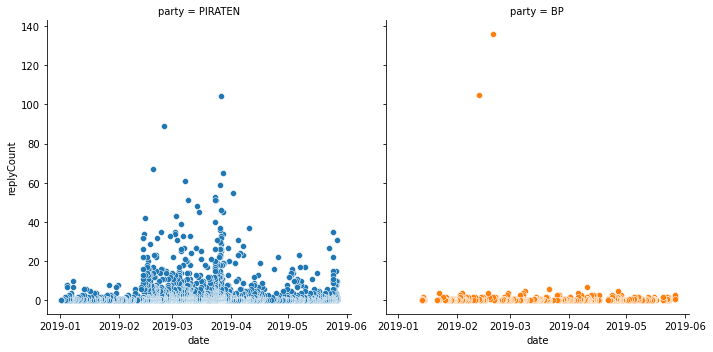

In [20]:
import seaborn as sns


g = sns.FacetGrid(df_sub, col="party", height=5,hue="party")
g.map_dataframe(sns.scatterplot, x="date",y="replyCount")

plt.savefig("plots/reply_frequ.png",bbox_inches='tight')

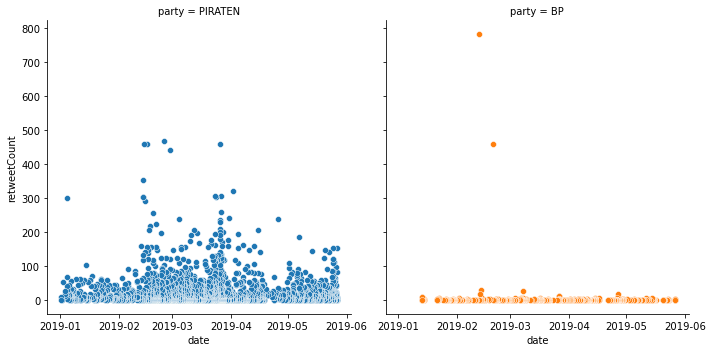

In [21]:
g = sns.FacetGrid(df_sub, col="party", height=5,hue="party")
g.map_dataframe(sns.scatterplot, x="date",y="retweetCount")

plt.savefig("plots/retweet_frequ.png",bbox_inches='tight')

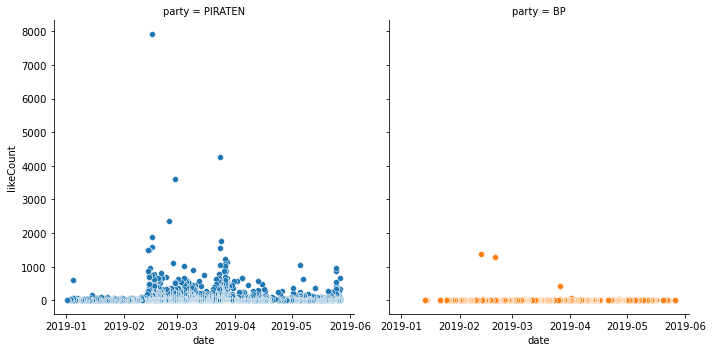

In [22]:
g = sns.FacetGrid(df_sub, col="party", height=5,hue="party")
g.map_dataframe(sns.scatterplot, x="date",y="likeCount")
plt.savefig("plots/like_frequ.png",bbox_inches='tight')

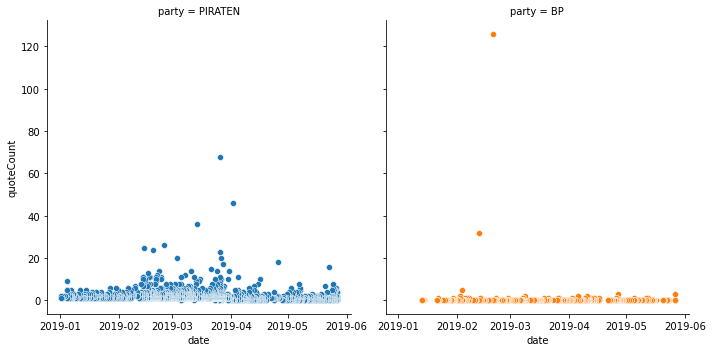

In [23]:
g = sns.FacetGrid(df_sub, col="party", height=5,hue="party")
g.map_dataframe(sns.scatterplot, x="date",y="quoteCount")
plt.savefig("plots/quote_frequ.png",bbox_inches='tight')

### look at outliner tweets/ "viral" tweets

In [24]:
df_bp = df_sub.loc[(df_sub['party'] == "BP")]
df_pi = df_sub.loc[(df_sub['party'] == "PIRATEN")]


bp_outlier_reply = df_bp[df_bp["replyCount"]>=40]
bp_outlier_retweet = df_bp[df_bp["retweetCount"]>=460]
bp_outlier_like = df_bp[df_bp["likeCount"]>=1000]
bp_outlier_quote = df_bp[df_bp["quoteCount"]>=25]

pi_outlier_reply = df_pi[df_pi["replyCount"]>=80]
pi_outlier_retweet = df_pi[df_pi["retweetCount"]>=460]
pi_outlier_like = df_pi[df_pi["likeCount"]>=4000]
pi_outlier_quote = df_pi[df_pi["quoteCount"]>=40]

In [25]:
### print bp ouliertweets

def print_tweets(df,attribute):
    print(attribute)
    for i,j,k in zip(df.date,df.content,df[attribute]):
        print(i)
        print(j)
        print(f"{attribute}: {k}")
        print()

In [26]:
print_tweets(pi_outlier_reply,"replyCount")
print_tweets(pi_outlier_retweet,"retweetCount")
print_tweets(pi_outlier_like,"likeCount")
print_tweets(pi_outlier_quote,"quoteCount")

replyCount
2019-03-26 19:55:39+00:00
Die nächste Strategie besteht nun darin, uns in die rechte Ecke zu rücken. Lassen wir uns das nicht bieten!

#artikel13 #artikel13demo #uploadfilter #saveyourinternet #PIRATEN #niemehrcdu https://t.co/GXJ2CW25V7
replyCount: 104

2019-02-24 18:58:20+00:00
Empörte Emails von #cdU-Politikern an @HerrNewstime.
Es gab mal Zeiten, da haben die Medien ne Schlagzeile aus so was gemacht.
#NieWiedercdU #Artikel13 #uploadfilter #SaveYourInternet https://t.co/CfCJFZp375
replyCount: 89

retweetCount
2019-03-26 14:05:51+00:00
So haben die #EU-Abgeordneten heute bei der #Urheberrechtsreform abgestimmt.
#SaveYourInternet #SaveTheInternet #Uploadfilter #Artikel13 #Artikel13Demo https://t.co/OrPruIfZAq
retweetCount: 460

2019-02-24 18:58:20+00:00
Empörte Emails von #cdU-Politikern an @HerrNewstime.
Es gab mal Zeiten, da haben die Medien ne Schlagzeile aus so was gemacht.
#NieWiedercdU #Artikel13 #uploadfilter #SaveYourInternet https://t.co/CfCJFZp375
retweetCount: 46

In [27]:
print_tweets(bp_outlier_reply,"replyCount")
print_tweets(bp_outlier_retweet,"retweetCount")
print_tweets(bp_outlier_like,"likeCount")
print_tweets(bp_outlier_quote,"quoteCount")

replyCount
2019-02-19 20:39:00+00:00
@Felisuco_ @AntonioMaestre We want a free and independent Bavaria.
This is part of our Programm.
replyCount: 136

2019-02-12 14:34:56+00:00
Solidarität mit den Angeklagten Politikerinnen und Politikern aus #Katalonien !
Politische Strafjustiz statt Dialog zwischen Katalanen und Spaniern darf die @EU_Commission nicht dulden!
#FreeCatalanPoliticalPrisoners 
#Solidaritat https://t.co/cxZqa32HXT
replyCount: 105

retweetCount
2019-02-19 20:39:00+00:00
@Felisuco_ @AntonioMaestre We want a free and independent Bavaria.
This is part of our Programm.
retweetCount: 460

2019-02-12 14:34:56+00:00
Solidarität mit den Angeklagten Politikerinnen und Politikern aus #Katalonien !
Politische Strafjustiz statt Dialog zwischen Katalanen und Spaniern darf die @EU_Commission nicht dulden!
#FreeCatalanPoliticalPrisoners 
#Solidaritat https://t.co/cxZqa32HXT
retweetCount: 783

likeCount
2019-02-19 20:39:00+00:00
@Felisuco_ @AntonioMaestre We want a free and independent Ba

### top outlinks

In [28]:
from collections import Counter
import tldextract


In [29]:
def get_link_counter(df):
    l_count = Counter()
    for linklist in df.outlinks:
        if linklist is not None:
            temp = [tldextract.extract(i).domain for i in linklist]
            l_count.update(temp)
    return l_count

In [30]:
link_counter_bp = get_link_counter(df_bp)
link_counter_pi = get_link_counter(df_pi)

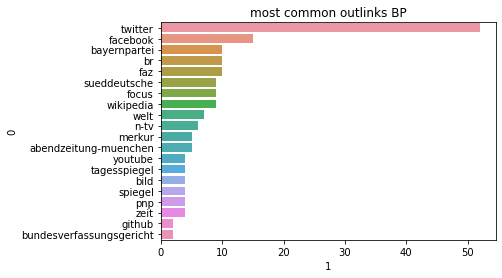

In [31]:
t = pd.DataFrame(link_counter_bp.most_common()[:20])
sns.barplot(x=1,y=0,data=t)
plt.title("most common outlinks BP")
plt.savefig("plots/mc_outlinks_bp.png",bbox_inches='tight')

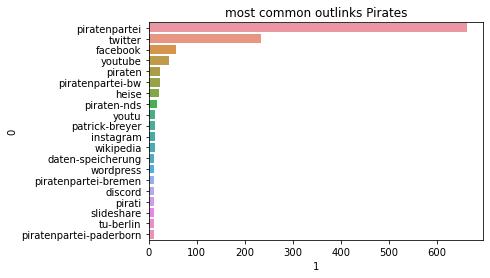

In [32]:
t = pd.DataFrame(link_counter_pi.most_common()[:20])
sns.barplot(x=1,y=0,data=t)
plt.title("most common outlinks Pirates")
plt.savefig("plots/mc_outlinks_pi.png",bbox_inches='tight')

In [33]:
unique_pi = Counter({k:v for k,v in link_counter_pi.items() if k in list(link_counter_pi.keys() - link_counter_bp.keys())})

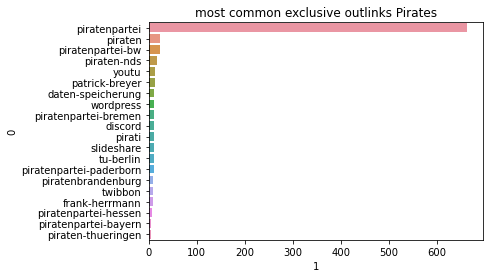

In [34]:
t = pd.DataFrame(unique_pi.most_common()[:20])
sns.barplot(x=1,y=0,data=t)
plt.title("most common exclusive outlinks Pirates")
plt.savefig("plots/mc_outlinks_pi_ex.png",bbox_inches='tight')

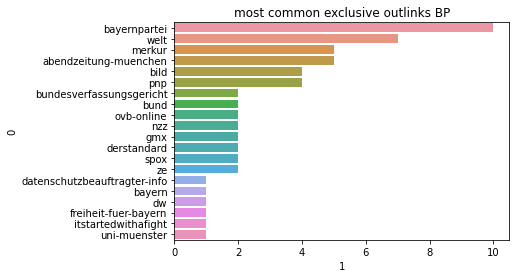

In [35]:
unique_bp = Counter({k:v for k,v in link_counter_bp.items() if k in list(link_counter_bp.keys() - link_counter_pi.keys())})
t = pd.DataFrame(unique_bp.most_common()[:20])
sns.barplot(x=1,y=0,data=t)

plt.title("most common exclusive outlinks BP")
plt.savefig("plots/mc_outlinks_bp_ex.png",bbox_inches='tight')

In [36]:
# make table for report

In [37]:
outlinks_bp = pd.DataFrame(link_counter_bp.most_common()[:20])[0]
outlinks_pi = pd.DataFrame(link_counter_pi.most_common()[:20])[0]
outlinks_bp_u = pd.DataFrame(unique_bp.most_common()[:20])[0]
outlinks_pi_u = pd.DataFrame(unique_pi.most_common()[:20])[0]


In [38]:
table_oulinks = pd.DataFrame(columns=["Bayernpartei","Bayernpartei unique","Piraten","Piratenpartei unique"],
             data=zip(outlinks_bp,outlinks_bp_u,outlinks_pi,outlinks_pi_u))

In [40]:
print(table_oulinks.to_latex())

\begin{tabular}{lllll}
\toprule
{} &              Bayernpartei &           Bayernpartei unique &                  Piraten &     Piratenpartei unique \\
\midrule
0  &                   twitter &                  bayernpartei &            piratenpartei &            piratenpartei \\
1  &                  facebook &                          welt &                  twitter &                  piraten \\
2  &              bayernpartei &                        merkur &                 facebook &         piratenpartei-bw \\
3  &                        br &         abendzeitung-muenchen &                  youtube &              piraten-nds \\
4  &                       faz &                          bild &                  piraten &                    youtu \\
5  &              sueddeutsche &                           pnp &         piratenpartei-bw &           patrick-breyer \\
6  &                     focus &      bundesverfassungsgericht &                    heise &        daten-speicherung \\

### top hashtags

In [41]:
def get_counter(df,attribut):
    l_count = Counter()
    for l in df[attribut]:
        if l is not None:
            l_count.update(l)
    return l_count

In [42]:
hashtags_bp = get_counter(df_bp,"hashtags")
hashtags_pi = get_counter(df_pi,"hashtags")

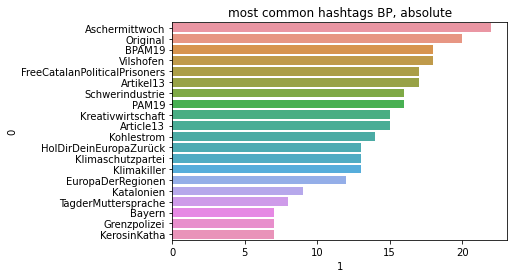

In [43]:
t = pd.DataFrame(hashtags_bp.most_common()[:20])
sns.barplot(x=1,y=0,data=t)

plt.title("most common hashtags BP, absolute")
plt.savefig("plots/mc_hashtags_bp.png",bbox_inches='tight')

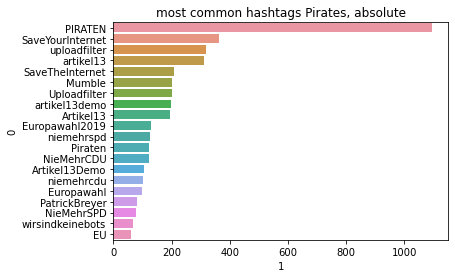

In [44]:
t = pd.DataFrame(hashtags_pi.most_common()[:20])
sns.barplot(x=1,y=0,data=t)

plt.title("most common hashtags Pirates, absolute")
plt.savefig("plots/mc_hashtags_pi.png",bbox_inches='tight')

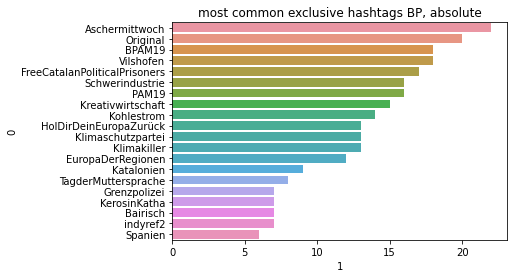

In [45]:
unique_bp = Counter({k:v for k,v in hashtags_bp.items() if k in list(hashtags_bp.keys() - hashtags_pi.keys())})
t = pd.DataFrame(unique_bp.most_common()[:20])
sns.barplot(x=1,y=0,data=t)

plt.title("most common exclusive hashtags BP, absolute")
plt.savefig("plots/mc_hashtags_bp_ex.png",bbox_inches='tight')

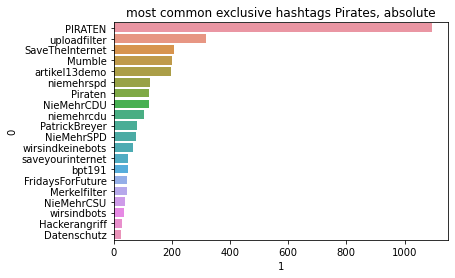

In [46]:
unique_pi = Counter({k:v for k,v in hashtags_pi.items() if k in list(hashtags_pi.keys() - hashtags_bp.keys())})
t = pd.DataFrame(unique_pi.most_common()[:20])
sns.barplot(x=1,y=0,data=t)

plt.title("most common exclusive hashtags Pirates, absolute")
plt.savefig("plots/mc_hashtags_pi_ex.png",bbox_inches='tight')

In [47]:
ht_bp = pd.DataFrame(pd.DataFrame(hashtags_bp.most_common()[:20]))[0]
ht_pi =  pd.DataFrame(hashtags_pi.most_common()[:20])[0]
ht_bp_u = pd.DataFrame(unique_bp.most_common()[:20])[0]
ht_pi_u = pd.DataFrame(unique_pi.most_common()[:20])[0]

In [48]:
table_ht = pd.DataFrame(columns=["Bayernpartei","Bayernpartei unique","Piraten","Piratenpartei unique"],
             data=zip(ht_bp,ht_bp_u,ht_pi,ht_pi_u))

In [49]:
table_ht

,Bayernpartei,Bayernpartei unique,Piraten,Piratenpartei unique
0,Aschermittwoch,Aschermittwoch,PIRATEN,PIRATEN
1,Original,Original,SaveYourInternet,uploadfilter
2,BPAM19,BPAM19,uploadfilter,SaveTheInternet
3,Vilshofen,Vilshofen,artikel13,Mumble
4,FreeCatalanPoliticalPrisoners,FreeCatalanPoliticalPrisoners,SaveTheInternet,artikel13demo
5,Artikel13,Schwerindustrie,Mumble,niemehrspd
6,Schwerindustrie,PAM19,Uploadfilter,Piraten
7,PAM19,Kreativwirtschaft,artikel13demo,NieMehrCDU
8,Kreativwirtschaft,Kohlestrom,Artikel13,niemehrcdu
9,Article13,HolDirDeinEuropaZurück,Europawahl2019,PatrickBreyer


In [50]:
print(table_ht.to_latex())

\begin{tabular}{lllll}
\toprule
{} &                   Bayernpartei &            Bayernpartei unique &           Piraten & Piratenpartei unique \\
\midrule
0  &                 Aschermittwoch &                 Aschermittwoch &           PIRATEN &              PIRATEN \\
1  &                       Original &                       Original &  SaveYourInternet &         uploadfilter \\
2  &                         BPAM19 &                         BPAM19 &      uploadfilter &      SaveTheInternet \\
3  &                      Vilshofen &                      Vilshofen &         artikel13 &               Mumble \\
4  &  FreeCatalanPoliticalPrisoners &  FreeCatalanPoliticalPrisoners &   SaveTheInternet &        artikel13demo \\
5  &                      Artikel13 &                Schwerindustrie &            Mumble &           niemehrspd \\
6  &                Schwerindustrie &                          PAM19 &      Uploadfilter &              Piraten \\
7  &                          PAM19 &  

### mentioned users

In [115]:
def get_user_counter(df):
    final_list = []
    for i in df.mentionedUsers:
        if i is not None:
            final_list.extend(i)
    
    final_list = [str(i) for i in final_list]
    
    return Counter(final_list)

In [116]:
mentionedU_bp = get_user_counter(df_bp)
mentionedU_pi = get_user_counter(df_pi)

In [117]:
t

,0,1
0,PIRATEN,1096
1,uploadfilter,317
2,SaveTheInternet,209
3,Mumble,200
4,artikel13demo,199
5,niemehrspd,125
6,Piraten,123
7,NieMehrCDU,121
8,niemehrcdu,103
9,PatrickBreyer,81


In [118]:
print(list(t[0]))

['PIRATEN', 'uploadfilter', 'SaveTheInternet', 'Mumble', 'artikel13demo', 'niemehrspd', 'Piraten', 'NieMehrCDU', 'niemehrcdu', 'PatrickBreyer', 'NieMehrSPD', 'wirsindkeinebots', 'saveyourinternet', 'bpt191', 'FridaysForFuture', 'Merkelfilter', 'NieMehrCSU', 'wirsindbots', 'Hackerangriff', 'Datenschutz']


In [121]:
# user_classification

u_class = {'https://twitter.com/CSU': "pol_right", 
           'https://twitter.com/BR24': "other",
           'https://twitter.com/Gruene_Muenchen':"pol_left",
           'https://twitter.com/GrueneRathaus_M':"pol_left",
           'https://twitter.com/spdde':"pol_left",
           'https://twitter.com/BayernSPD': "pol_left",
           'https://twitter.com/CDU':"pol_right",
           'https://twitter.com/EFAparty':"unique_topic",
           'https://twitter.com/KathaSchulze': "pol_left",
           'https://twitter.com/katarinabarley':"pol_left",
           'https://twitter.com/FlorianvonBrunn':"pol_left",
           'https://twitter.com/AnnieMuc':"pol_left",
           'https://twitter.com/MontserratVaNo':"unique_topic",
           'https://twitter.com/HilgerAlexander': "self_reference",
           'https://twitter.com/scaper21':"unique_topic",
           'https://twitter.com/RathausSPD':"pol_left",
           'https://twitter.com/CSUimRathaus':"pol_right",
           'https://twitter.com/dieLinke':"pol_left",
           'https://twitter.com/Roland_Hindl':"influencer",
           'https://twitter.com/Markus_Soeder':"pol_right",
           'https://twitter.com/echo_pbreyer':"self_reference",
           'https://twitter.com/Senficon':"self_reference",
           'https://twitter.com/HerrNewstime':"influencer",
           'https://twitter.com/AxelVossMdEP':"pol_right",
           'https://twitter.com/sebulino':"self_reference", 
           'https://twitter.com/fdp':"pol_right", 
           'https://twitter.com/Die_Gruenen':"pol_left", 
           'https://twitter.com/CDU_CSU_EP':"pol_right", 
           'https://twitter.com/woelken':"pol_left", 
           'https://twitter.com/PiratenBW':"self_reference", 
           'https://twitter.com/jona_bab':"self_reference", 
           'https://twitter.com/uploadfilter':"unique_topic", 
           'https://twitter.com/pr02':"self_reference", 
           'https://twitter.com/Gronkh':"influencer", 
           'https://twitter.com/DiePARTEI':"pol_left", 
           'https://twitter.com/ManfredWeber':"pol_right", 
           'https://twitter.com/Maurice_Conrad':"influencer",
           'https://twitter.com/HubertDornBP':"self_reference", 
           'https://twitter.com/Andre_Waechter':"self_reference", 
           'https://twitter.com/Radentscheid_M':"other", 
           'https://twitter.com/NeuImNeuland':"other", 
           'https://twitter.com/theSNP':"unique_topic", 
           'https://twitter.com/kingknorr':"influencer", 
           'https://twitter.com/boarischgredt':"influencer",
           'https://twitter.com/PiratenNDS':"self_reference",
           'https://twitter.com/rewinside':"influencer", 
           'https://twitter.com/PIRATEN_Saar':"self_reference", 
           'https://twitter.com/AnonNewsDE':"other", 
           'https://twitter.com/ZoeyMatthies':"influencer", 
           'https://twitter.com/_rony':"self_reference", 
           'https://twitter.com/PiratenBayern':"self_reference", 
           'https://twitter.com/andyalt1':"other", 
           'https://twitter.com/piratenparteibb':"self_reference"
          }

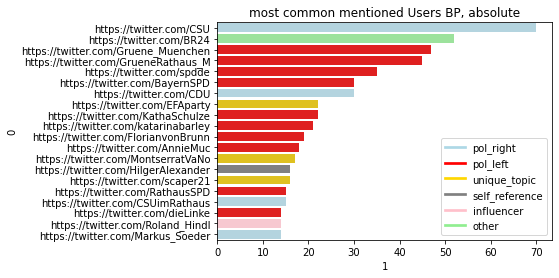

In [122]:
t = pd.DataFrame(mentionedU_bp.most_common()[:20])
t["label"] = [u_class[i] for i in t[0]]

clrs = ["lightblue", "lightgreen", "red","gold","grey","pink"]


ax = sns.barplot(x=1,y=0,data=t,hue="label",dodge=False, palette=clrs)
plt.legend(["pol_right","pol_left","unique_topic","self_reference","influencer","other"])
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_line0'].set_color('lightblue')
hl_dict['_line1'].set_color('red')
hl_dict['_line2'].set_color('gold')
hl_dict['_line3'].set_color('grey')
hl_dict['_line4'].set_color('pink')
hl_dict['_line5'].set_color('lightgreen')

plt.title("most common mentioned Users BP, absolute")
plt.savefig("plots/mc_mentionedU_bp.png",bbox_inches='tight')

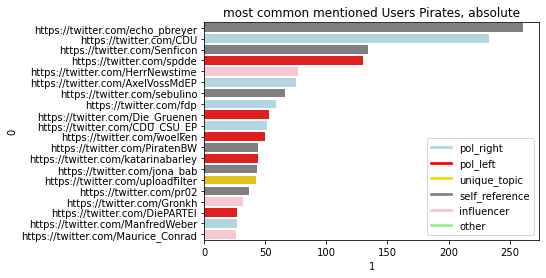

In [123]:
t = pd.DataFrame(mentionedU_pi.most_common()[:20])
t["label"] = [u_class[i] for i in t[0]]
clrs = ["grey", "lightblue", "red","pink","gold"]


ax = sns.barplot(x=1,y=0,data=t,hue="label",dodge=False,palette=clrs)

plt.legend(["pol_right","pol_left","unique_topic","self_reference","influencer","other"])
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_line0'].set_color('lightblue')
hl_dict['_line1'].set_color('red')
hl_dict['_line2'].set_color('gold')
hl_dict['_line3'].set_color('grey')
hl_dict['_line4'].set_color('pink')
hl_dict['_line5'].set_color('lightgreen')

plt.title("most common mentioned Users Pirates, absolute")
plt.savefig("plots/mc_mentionedU_pi.png",bbox_inches='tight')

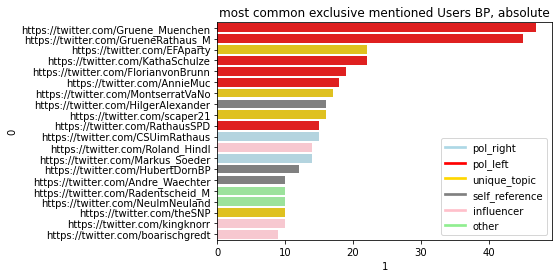

In [124]:
unique_bp = Counter({k:v for k,v in mentionedU_bp.items() if k in list(mentionedU_bp.keys() - mentionedU_pi.keys())})
t = pd.DataFrame(unique_bp.most_common()[:20])
t["label"] = [u_class[i] for i in t[0]]

clrs = ["red", "gold", "grey","lightblue","pink","lightgreen"]

ax = sns.barplot(x=1,y=0,data=t,hue="label",dodge=False,palette=clrs)


plt.legend(["pol_right","pol_left","unique_topic","self_reference","influencer","other"])
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_line0'].set_color('lightblue')
hl_dict['_line1'].set_color('red')
hl_dict['_line2'].set_color('gold')
hl_dict['_line3'].set_color('grey')
hl_dict['_line4'].set_color('pink')
hl_dict['_line5'].set_color('lightgreen')

plt.title("most common exclusive mentioned Users BP, absolute")
plt.savefig("plots/mc_mentionedU_bp_ex.png",bbox_inches='tight')

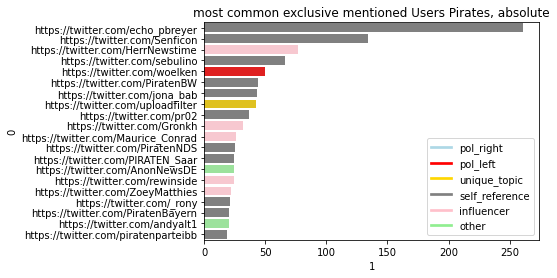

In [125]:
unique_pi = Counter({k:v for k,v in mentionedU_pi.items() if k in list(mentionedU_pi.keys()-mentionedU_bp.keys())})
t = pd.DataFrame(unique_pi.most_common()[:20])
t["label"] = [u_class[i] for i in t[0]]

clrs = ["grey", "pink", "red","gold","lightgreen"]

ax = sns.barplot(x=1,y=0,data=t,hue="label",dodge=False,palette=clrs)


plt.legend(["pol_right","pol_left","unique_topic","self_reference","influencer","other"])
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_line0'].set_color('lightblue')
hl_dict['_line1'].set_color('red')
hl_dict['_line2'].set_color('gold')
hl_dict['_line3'].set_color('grey')
hl_dict['_line4'].set_color('pink')
hl_dict['_line5'].set_color('lightgreen')

plt.title("most common exclusive mentioned Users Pirates, absolute")
plt.savefig("plots/mc_mentionedU_pi_ex.png",bbox_inches='tight')

# Analysis of Language use before European election 2021

In [126]:
import re


In [127]:
#https://medium.com/codex/making-wordcloud-of-tweets-using-python-ca114b7a4ef4
# https://stackoverflow.com/questions/53322870/unable-to-remove-some-emojis-from-tweets-in-python

df2 =df_sub.copy()
# remove emoticons
df2['content'] = df2['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# remove links
df2['content'] = df2['content'].replace(r'http\S+', '', regex=True)

# remove @ and # signs
# df2['content'] = df2['content'].replace("#","")
# df2['content'] = df2['content'].replace("@","")


mask = df2['content'].str.len() >= 2
df2 = df2[mask]

df2.reset_index(inplace=True,drop=True)

In [128]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL.Image import core as _imaging

stopset = stopwords.words('german')
#stopset.extend(["https","twitter"])

from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()

def preprocessing(col):
    # preprocessing
    preprocessed_tweets = []
    for t in col:
        lower_case = t.lower()
        words = token.tokenize(lower_case)
        word_del_stop = [i for i in words if i not in stopset]
        
        result_words = [x for x in word_del_stop if len(x) > 2]
        preprocessed_tweets.append((" ".join(result_words)).strip())
        
    return pd.Series(preprocessed_tweets).str.cat(sep=' ')


def wc_from_col(col):
        
    string = preprocessing(col)
    
    # wordcloud
    wordcloud = WordCloud().generate(string)
    wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)

    return wordcloud

In [129]:
df_sub_1_bp = df2[df2["party"] == "BP"]
df_sub_1_pi = df2[df2["party"] == "PIRATEN"]
ds_list = [df_sub_1_bp,df_sub_1_pi]

In [130]:
Counter(df_sub_1_bp.sent)

Counter({'neutral': 551, 'negative': 168, 'positive': 104})

In [131]:
print(167/(553+167+103))
print(103/(553+167+103))

0.20291616038882138
0.12515188335358446


In [132]:
Counter(df_sub_1_pi.sent)

Counter({'neutral': 1666, 'negative': 862, 'positive': 395})

In [133]:
print(863/(1666+863+395))
print(395/(1666+863+395))

0.2951436388508892
0.1350889192886457


C:\Users\Lion\anaconda3\envs\wahlomat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

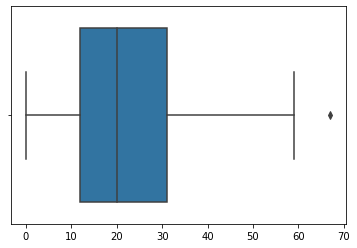

In [134]:
# ave tweet length

bp_tweet_tok = [token.tokenize(string) for string in df_sub_1_bp.content]
sum([len(i) for i in bp_tweet_tok])/len(bp_tweet_tok)


sns.boxplot([len(i) for i in bp_tweet_tok])

C:\Users\Lion\anaconda3\envs\wahlomat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

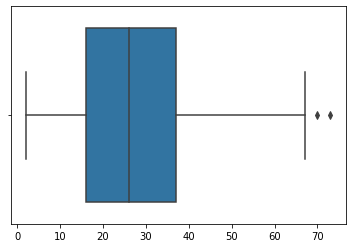

In [135]:
bp_tweet_tok = [token.tokenize(string) for string in df_sub_1_pi.content]
sum([len(i) for i in bp_tweet_tok])/len(bp_tweet_tok)

sns.boxplot([len(i) for i in bp_tweet_tok])

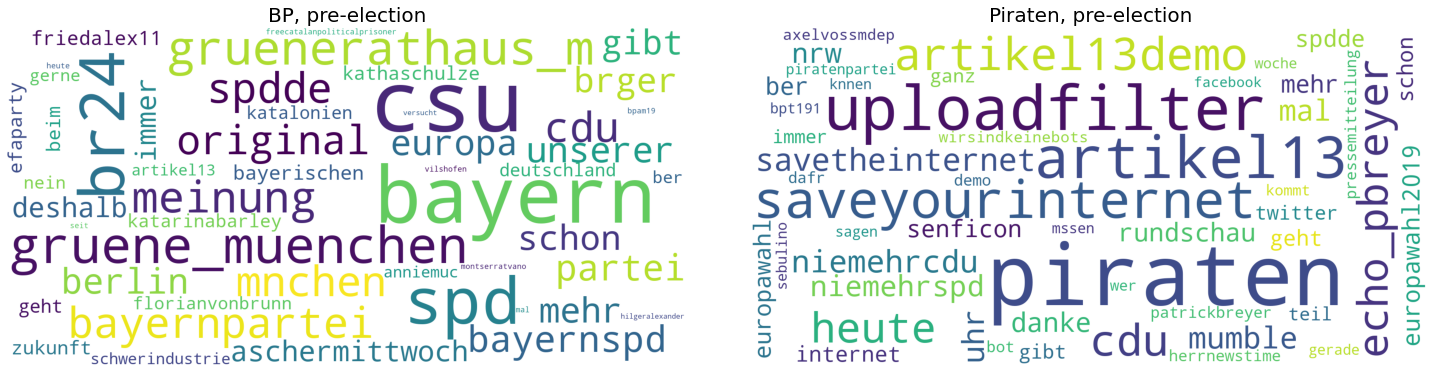

In [136]:
# https://stackoverflow.com/questions/34165130/side-by-side-wordclouds-in-matplotlib

title_dict = {0:"BP, pre-election",1:"Piraten, pre-election"}

fig = plt.figure(figsize=(30,20))
for i,d in enumerate(ds_list):
    ax = fig.add_subplot(3,2,i+1)
    wordcloud = wc_from_col(d.content)
    ax.imshow(wordcloud)
    ax.axis('off')
    ax.set_title(title_dict[i],fontsize=20)
    
plt.subplots_adjust(wspace=-0.2, hspace=0.1)

plt.savefig("plots/wordclouds.png",bbox_inches='tight')

#### Plot frequency*word rank



In [137]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams

nltk.download('omw-1.4')
def word_frequency(string):

    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = token.tokenize(string)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopset]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lion\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


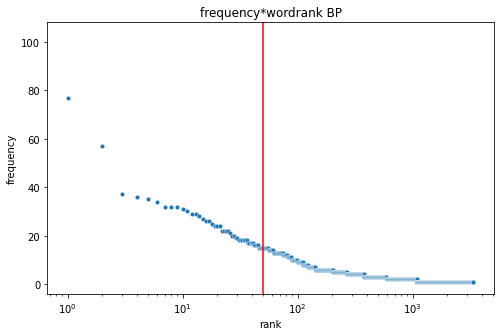

In [138]:
cleaned_string = preprocessing(ds_list[0].content)
word_freq,word_pairs,trigrams = word_frequency(cleaned_string)
fig, axes = plt.subplots(figsize=(8,5))

axes.set(xscale="log")
word_freq["rank"] = [i for i in range(len(word_freq))]
sns.scatterplot(data=word_freq,x="rank",y="frequency",s=20)
plt.axvline(50, color='r')

plt.title("frequency*wordrank BP")
plt.savefig("plots/wrank_bp.png",bbox_inches='tight')

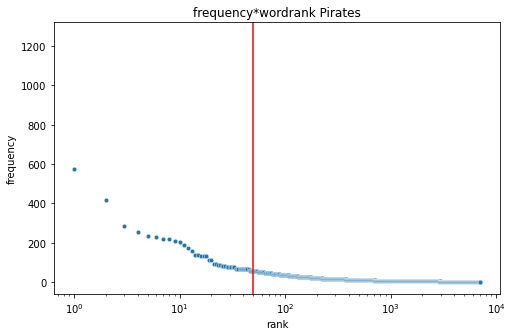

In [139]:
cleaned_string = preprocessing(ds_list[1].content)
word_freq,word_pairs,trigrams = word_frequency(cleaned_string)
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
axes.set(xscale="log")

word_freq["rank"] = [i for i in range(len(word_freq))]
sns.scatterplot(data=word_freq,x="rank",y="frequency",s=20)
plt.axvline(50, color='r')

plt.title("frequency*wordrank Pirates")
plt.savefig("plots/wrank_pi.png",bbox_inches='tight')

#### compare relative frequency of words

https://www.absentdata.com/python-graphs/python-word-frequency/

In [140]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams

nltk.download('omw-1.4')

def word_frequency(string):

    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = token.tokenize(string)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopset]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_pairs,trigrams

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lion\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


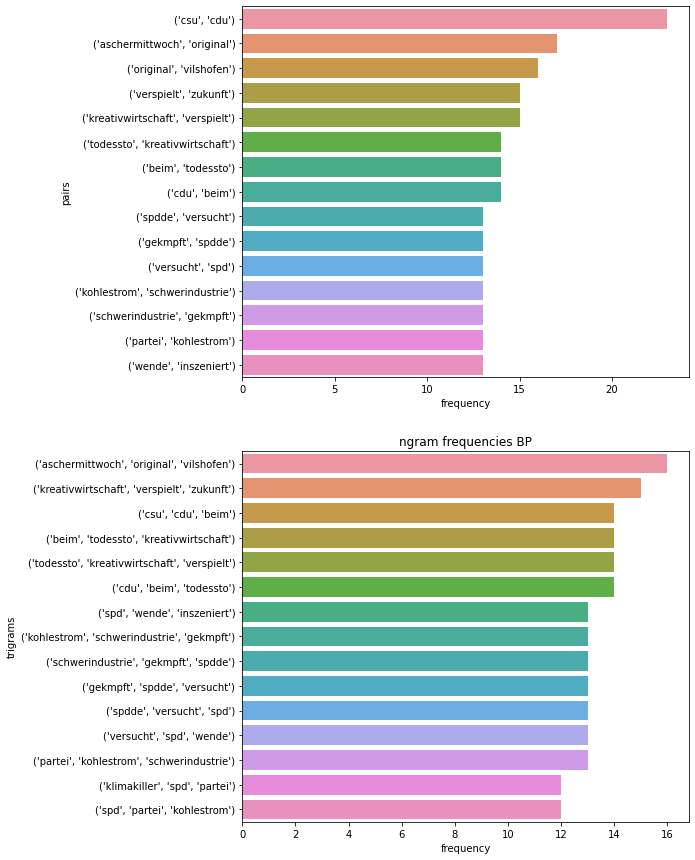

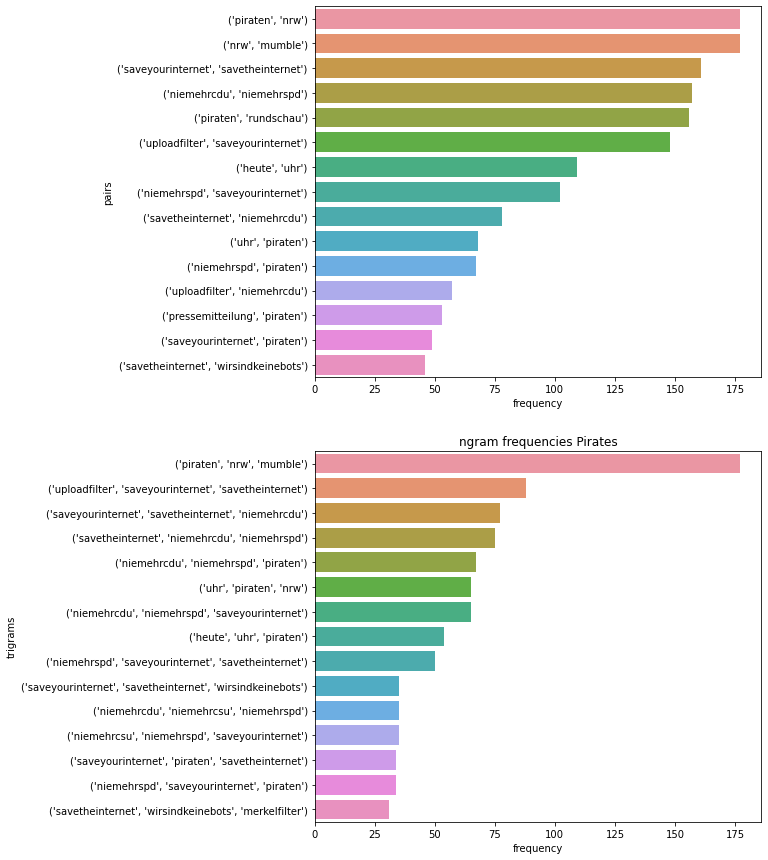

In [141]:
from nltk import FreqDist
for j,i in enumerate(ds_list):
    cleaned_string = preprocessing(i.content)
    
    word_pairs,trigrams = word_frequency(cleaned_string)
    
    fig, axes = plt.subplots(2,1,figsize=(8,15))

    sns.barplot(ax=axes[0],x='frequency',y='pairs',data=word_pairs.head(15))
    sns.barplot(ax=axes[1],x='frequency',y='trigrams',data=trigrams.head(15))
    
    if j == 0:
        plt.title("ngram frequencies BP")
        plt.savefig("plots/ngram_bp.png",bbox_inches='tight')
    else: pass
    
    if j ==1:
        plt.title("ngram frequencies Pirates")
        plt.savefig("plots/ngram_pi.png",bbox_inches='tight')
    else: pass

#### relative tweet frequ

In [142]:
n_t_pi =len(df_sub_1_pi)
n_t_bp =len(df_sub_1_bp)

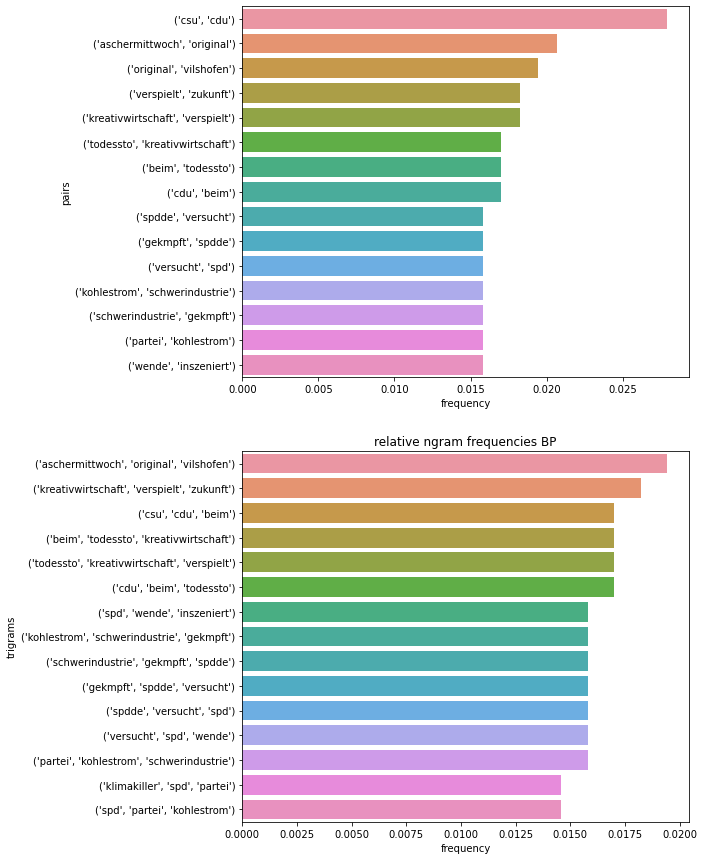

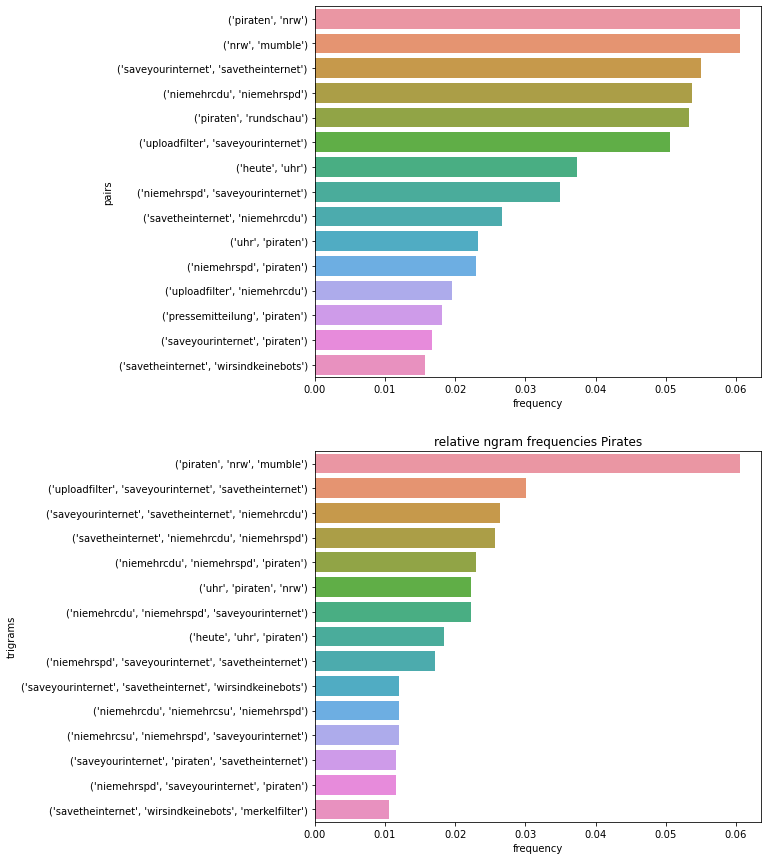

In [143]:
for j,i in enumerate(ds_list):
    cleaned_string = preprocessing(i.content)
    
    word_pairs,trigrams = word_frequency(cleaned_string)
    
    if j==0:
        word_pairs["frequency"] = word_pairs["frequency"]/n_t_bp
        trigrams["frequency"] = trigrams["frequency"]/n_t_bp
    else:
        word_pairs["frequency"] = word_pairs["frequency"]/n_t_pi
        trigrams["frequency"] = trigrams["frequency"]/n_t_pi
    
    fig, axes = plt.subplots(2,1,figsize=(8,15))
    
    sns.barplot(ax=axes[0],x='frequency',y='pairs',data=word_pairs.head(15))
    sns.barplot(ax=axes[1],x='frequency',y='trigrams',data=trigrams.head(15))
    
    
    
    if j == 0:
        plt.title("relative ngram frequencies BP")
        plt.savefig("plots/rel_ngram_bp.png",bbox_inches='tight')
    else: pass
    
    if j == 1:
        plt.title("relative ngram frequencies Pirates")
        plt.savefig("plots/rel_ngram_pi.png",bbox_inches='tight')
    else: pass